### Práctica 4 - Procesamiento de audio

Integrantes: Alejandro Bolaños García - David García Díaz

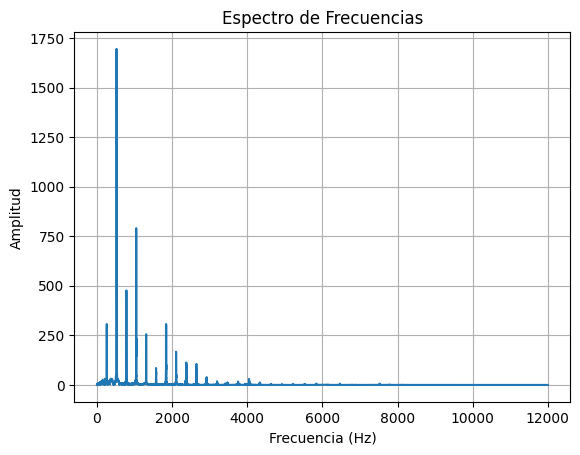

Frecuencia fundamental: 521.7261904761905 Hz


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt, lfilter

#Leer el archivo de audio
sample_rate, data = wavfile.read('notas_piano/do.wav')

#Si el audio es estéreo, selecciona un solo canal
if len(data.shape) > 1:
    data = data[:,0]

#Número de muestras
N = len(data)
T=1.0/sample_rate

#Calcular la FFT
yf = fft(data)
xf = fftfreq(N,T)[:N//2]

#Visualizar el espectro de frecuencias
plt.plot(xf,2.0/N * np.abs(yf[0:N//2]))
plt.title('Espectro de Frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
#Eje X (Frecuencia): Muestra las frecuencias presentes en la señal.
#Eje Y (Amplitud): Muestra la magnitud de cada frecuencia. 
#Picos altos indican las frecuencias dominantes en la señal.

#Esta línea de código imprime la frecuencia fundamental de la señal de audio, que es la frecuencia con la amplitud más alta en el espectro de frecuencias.
frecuencia_nota = xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))]
print('Frecuencia fundamental:', frecuencia_nota, 'Hz')



#### Ejercicio 1

In [18]:
# Diccionario con las frecuencias de las notas musicales en Hz de cada octava por columna 
notas_frecuencias = {
    'Do': [16.3516, 32.7032, 65.4064, 130.813, 261.626, 523.251, 1046.50, 2093.00, 4186.01],
    'Do#': [17.3239, 34.6479, 69.2957, 138.591, 277.183, 554.365, 1108.73, 2217.46, 4434.92],
    'Re': [18.3540, 36.7081, 73.4162, 146.832, 293.665, 587.330, 1174.66, 2349.32, 4698.64],
    'Re#': [19.4454, 38.8909, 77.7817, 155.563, 311.127, 622.254, 1244.51, 2489.02, 4978.04],
    'Mi': [20.6017, 41.2035, 82.4069, 164.814, 329.627, 659.255, 1318.51, 2637.02, 5274.04],
    'Fa': [21.8268, 43.6536, 87.3071, 174.614, 349.228, 698.456, 1396.91, 2793.83, 5587.65],
    'Fa#': [23.1246, 46.2493, 92.4986, 184.997, 369.994, 739.989, 1479.98, 2959.96, 5919.91],
    'Sol': [24.4997, 48.9994, 97.9989, 195.998, 391.995, 783.991, 1567.98, 3135.96, 6271.93],
    'Sol#': [25.9565, 51.9131, 103.826, 207.652, 415.305, 830.609, 1661.22, 3322.44, 6644.88],
    'La': [27.5000, 55.0000, 110.000, 220.000, 440.000, 880.000, 1760.00, 3520.00, 7040.00],
    'La#': [29.1352, 58.2705, 116.541, 233.082, 466.164, 932.328, 1864.66, 3729.31, 7458.62],
    'Si': [30.8677, 61.7354, 123.471, 246.942, 493.883, 987.767, 1975.53, 3951.07, 7902.13]
}

In [19]:

# Esta función recibe una frecuencia y retorna la nota musical correspondiente.
def identificador_nota(frecuencia):
    tolerancia = 0.05  # 5% de tolerancia sobre la frecuencia
    for nota, frecuencias in notas_frecuencias.items():
        for octava, f_hz in enumerate(frecuencias):
            if (1 - tolerancia) * f_hz < frecuencia < (1 + tolerancia) * f_hz:
                print(f"Nota identificada: {nota} en octava {octava} ({f_hz} Hz)")
                return nota, octava, f_hz
    print(f"Frecuencia {frecuencia} no coincide con ninguna nota.")
    return None


# Función para aplicar filtro pasa banda
def filtro_pasa_banda(datos, fs, lowcut=10, highcut=8000, orden=5):
    # Crear el filtro Butterworth
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(orden, [low, high], btype='band')
    datos_filtrados = lfilter(b, a, datos)
    return datos_filtrados



def get_frecuencia_sonido(ruta_archivo):
    
    #Leer el archivo de audio
    sample_rate, data = wavfile.read(ruta_archivo)

    #Si el audio es estéreo, selecciona un solo canal
    if len(data.shape) > 1:
        data = data[:,0]

    #Número de muestras
    N = len(data)
    T=1.0/sample_rate

    #Calcular la FFT
    yf = fft(data)
    xf = fftfreq(N,T)[:N//2]

    #Esta línea de código imprime la frecuencia fundamental de la señal de audio, que es la frecuencia con la amplitud más alta en el espectro de frecuencias.
    frecuencia_dominante = xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))]
    
    identificador_nota(frecuencia_dominante)
    
    print('Frecuencia fundamental:', frecuencia_dominante, 'Hz')

get_frecuencia_sonido("notas_piano/si.wav") 


Nota identificada: Si en octava 4 (493.883 Hz)
Frecuencia fundamental: 492.59259259259267 Hz


#### Usando función find_peaks

In [22]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, find_peaks


# Parámetros de la grabación
formato = pyaudio.paInt32  # Formato de la muestra (16-bit)
canales = 1  # 1 para mono
tasa_muestreo = 44100  # Frecuencia de muestreo en Hz
tamano_buffer = 1024  # Tamaño del buffer (cantidad de muestras por captura)

# Inicializar PyAudio
p = pyaudio.PyAudio()

# Función para capturar y procesar audio en tiempo real
def capturar_y_procesar_audio(duracion, n_mayores):
    stream = p.open(format=formato,
                    channels=canales,
                    rate=tasa_muestreo,
                    input=True,
                    frames_per_buffer=tamano_buffer)

    print("Grabando...")

    for _ in range(0, int(tasa_muestreo / tamano_buffer * duracion)):
        # Leer los datos crudos del audio
        datos = stream.read(tamano_buffer)
        
        # Convertir los datos crudos a un arreglo de numpy
        datos_np = np.frombuffer(datos, dtype=np.int16)
        
        # Filtrar los datos (puedes añadir filtro pasa banda si es necesario)
        datos_filtrados = filtro_pasa_banda(datos_np, tasa_muestreo)
        
        # Procesar los datos (calcular la FFT)
        N = len(datos_filtrados)
        yf = fft(datos_filtrados)
        xf = fftfreq(N, 1/tasa_muestreo)
        yf_abs = 2.0/N * np.abs(yf[:N//2])  # Tomar solo la parte positiva
        
        # Umbral de amplitud para filtrar el ruido de fondo
        umbral_amplitud = 500
        
        # Usar find_peaks para encontrar los picos significativos
        picos, propiedades = find_peaks(yf_abs, height=umbral_amplitud, distance=20)  # Ajusta la distancia según el contexto
        
    
        if len(picos) > 0:
            # Ordenar los picos en función de sus amplitudes en orden descendente
            amplitudes_picos = propiedades["peak_heights"]
            indices_ordenados = np.argsort(amplitudes_picos)[::-1]
            
            # Seleccionar solo los `n_mayores` picos de mayor amplitud
            picos_mayores = picos[indices_ordenados[:n_mayores]]
            
            # Iterar sobre los picos de mayor amplitud y procesar la frecuencia
            for pico in picos_mayores:
                frecuencia_sonido = xf[pico]
                identificador_nota(frecuencia_sonido)
    
    print("Grabación finalizada")
    stream.stop_stream()
    stream.close()

# Ejecutar la captura y procesamiento de audio en tiempo real durante 25 segundos
capturar_y_procesar_audio(25, 1)

# Cerrar PyAudio
p.terminate()


Grabando...
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Re en octava 3 (146.832 Hz)
Nota identificada: Re en octava 3 (146.832 Hz)
Nota identificada: Do en octava 3 (130.813 Hz)
Nota identificada: Do en octava 3 (130.813 Hz)
Nota identificada: Do en octava 3 (130.813 Hz)
Nota identificada: Do en octava 3 (130.813 Hz)
Nota identificada: Fa# en octava 3 (184.997 Hz)
Nota identificada: Fa# en octava 3 (184.997 Hz)
Nota identificada: Fa# en octava 3 (184.997 Hz)


KeyboardInterrupt: 

#### Sin usar find_peaks tan solo detectando la frecuencia más alta

In [21]:
import pyaudio
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter

# Parámetros de la grabación
formato = pyaudio.paInt32  # Formato de la muestra (16-bit)
canales = 1  # Mono
tasa_muestreo = 44100  # Frecuencia de muestreo en Hz
tamano_buffer = 1024  # Tamaño del buffer (cantidad de muestras por captura)

# Inicializar PyAudio
p = pyaudio.PyAudio()

# Función para capturar y procesar audio en tiempo real
def capturar_y_procesar_audio(duracion=25):
    stream = p.open(format=formato,
                    channels=canales,
                    rate=tasa_muestreo,
                    input=True,
                    frames_per_buffer=tamano_buffer)

    print("Grabando...")

    for _ in range(0, int(tasa_muestreo / tamano_buffer * duracion)):
        # Leer los datos crudos del audio
        datos = stream.read(tamano_buffer)
        
        # Convertir los datos crudos a un arreglo de numpy
        datos_np = np.frombuffer(datos, dtype=np.int16)
        
        # Aplicar filtro pasa banda
        datos_filtrados = filtro_pasa_banda(datos_np, tasa_muestreo)
        
        # Procesar los datos (calcular la FFT)
        N = len(datos_filtrados)
        yf = fft(datos_filtrados)
        xf = fftfreq(N, 1 / tasa_muestreo)
        yf_abs = 2.0 / N * np.abs(yf[:N // 2])  # Tomar solo la parte positiva
        
        # Encontrar el índice de la frecuencia con mayor amplitud
        indice_max = np.argmax(yf_abs)
        frecuencia_sonido = xf[indice_max]
        amplitud_max = yf_abs[indice_max]

        # Verificar si la amplitud es mayor que 1000 antes de identificar la nota
        if amplitud_max > 1000:
            identificador_nota(frecuencia_sonido)

    print("Grabación finalizada")
    stream.stop_stream()
    stream.close()

# Ejecutar la captura y procesamiento de audio en tiempo real durante 25 segundos
capturar_y_procesar_audio(25)

# Cerrar PyAudio
p.terminate()


Grabando...
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Do# en octava 4 (277.183 Hz)
Nota identificada: Re en octava 3 (146.832 Hz)
Nota identificada: La# en octava 3 (233.082 Hz)
Nota identificada: La# en octava 3 (233.082 Hz)
Nota identificada: La# en octava 3 (233.082 Hz)
Nota identificada: Re en octava 3 (146.832 Hz)
Nota identificada: Re en octava 3 (146.832 Hz)
Nota identificada: Do en octava 3 (130.813 Hz)
Nota identificada: Fa# en octava 3 (184.997 Hz)
Nota identificada: Fa# en octava 3 (184.997 Hz)


KeyboardInterrupt: 

#### Ejercicio 2

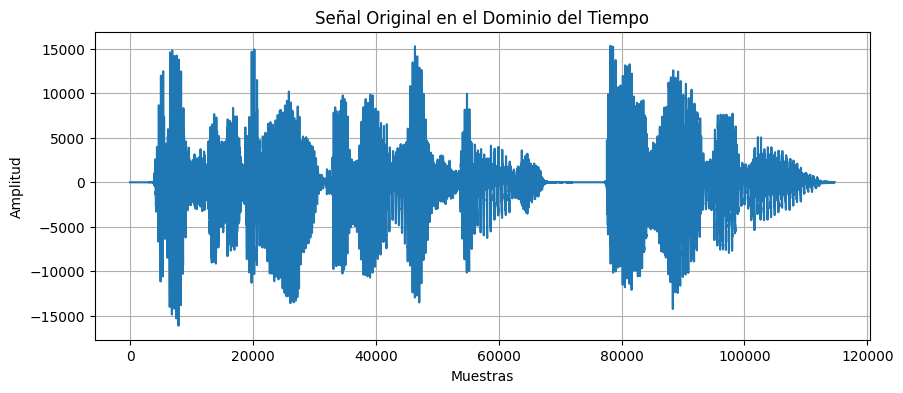

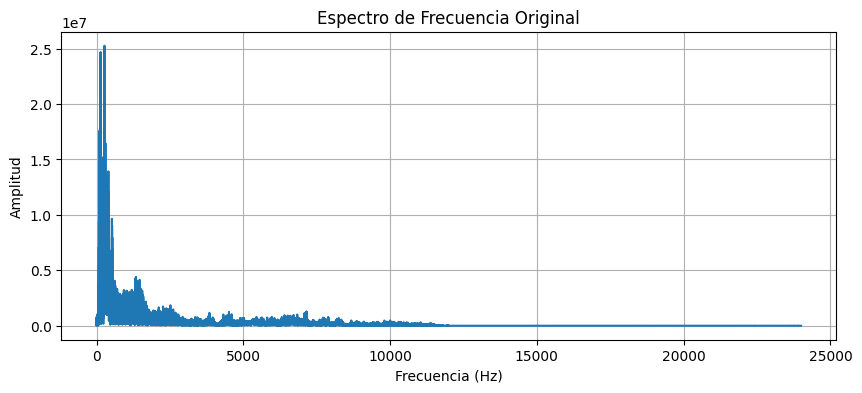

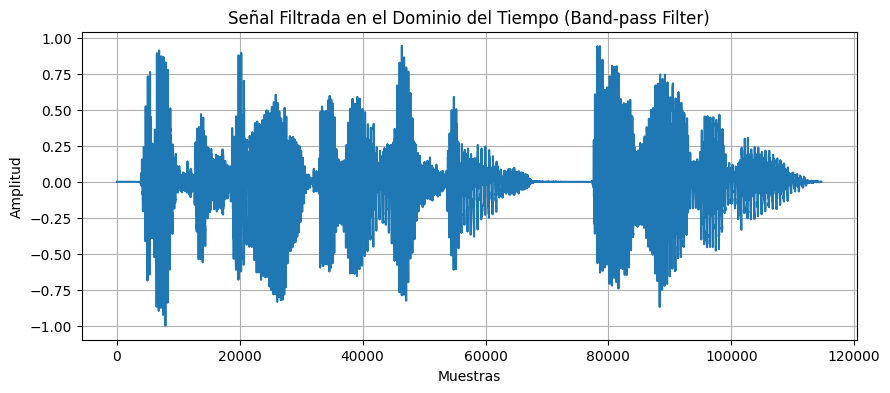

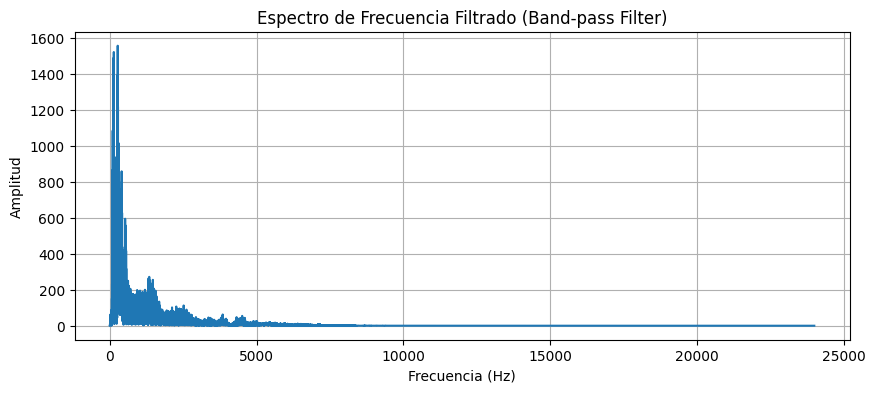

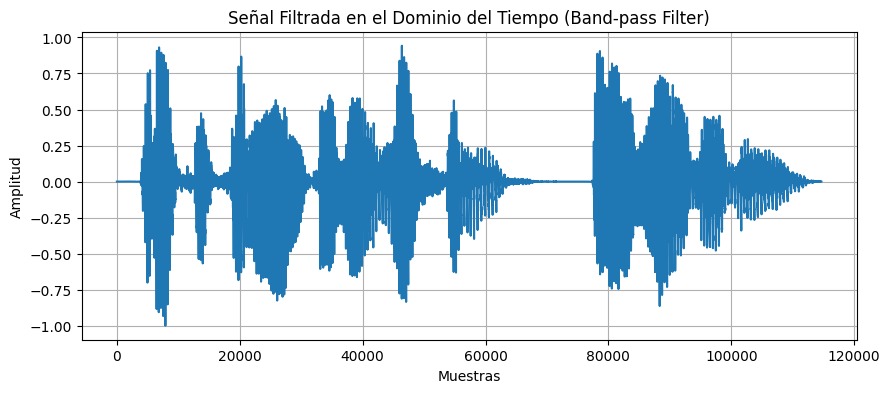

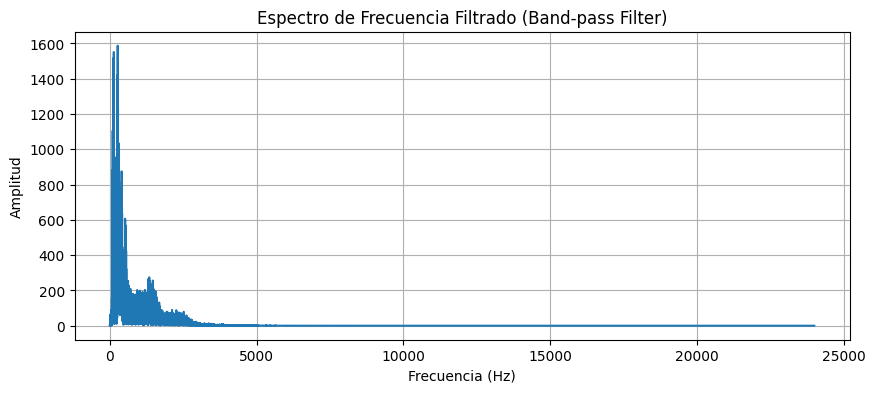

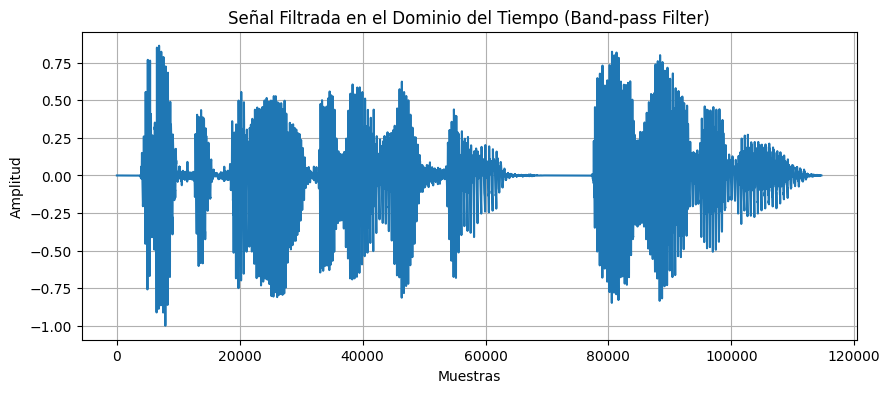

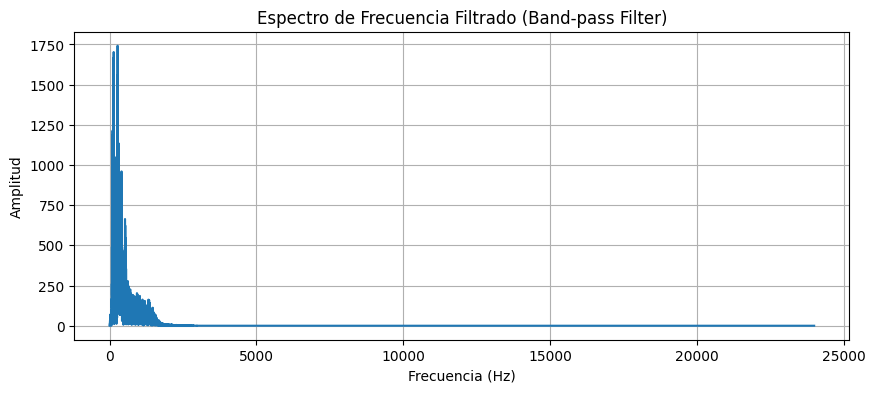

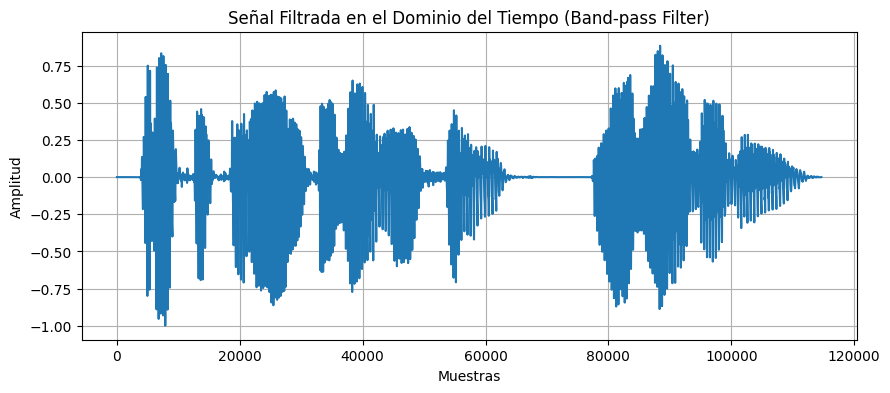

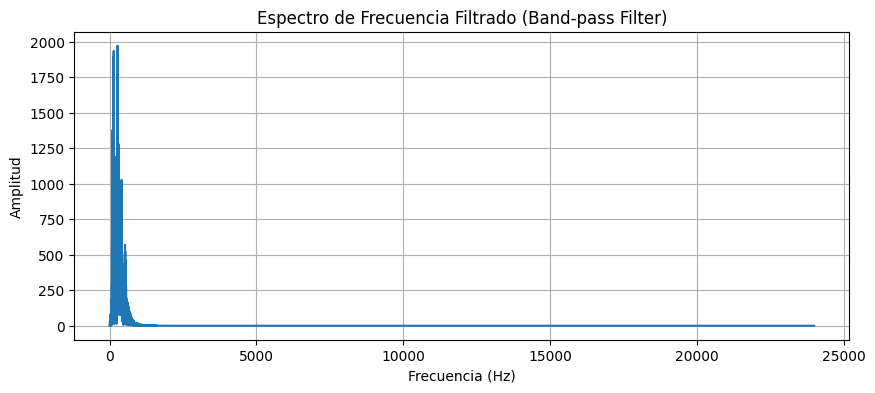

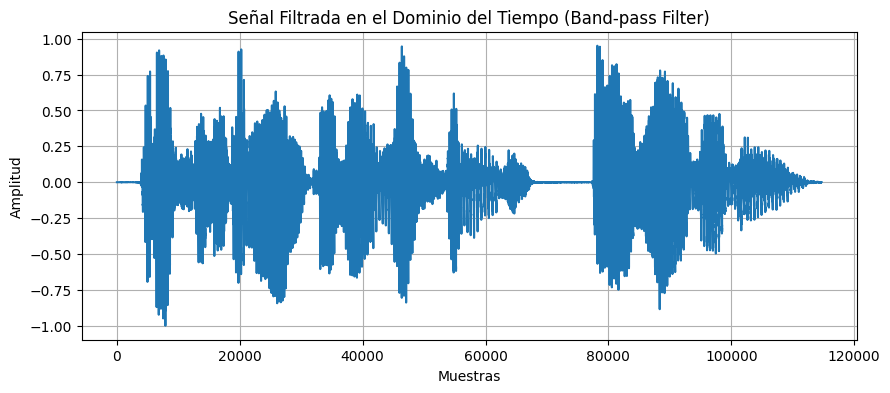

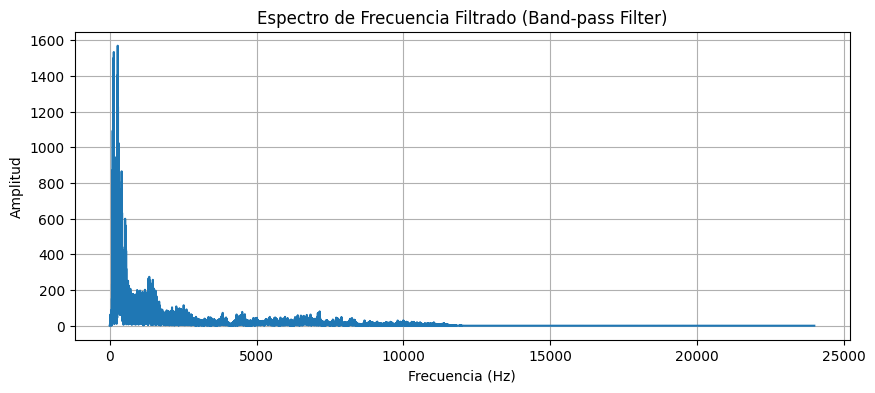

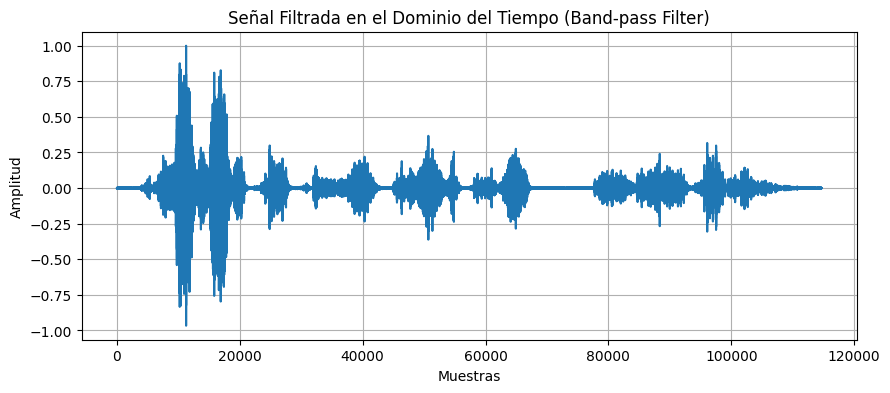

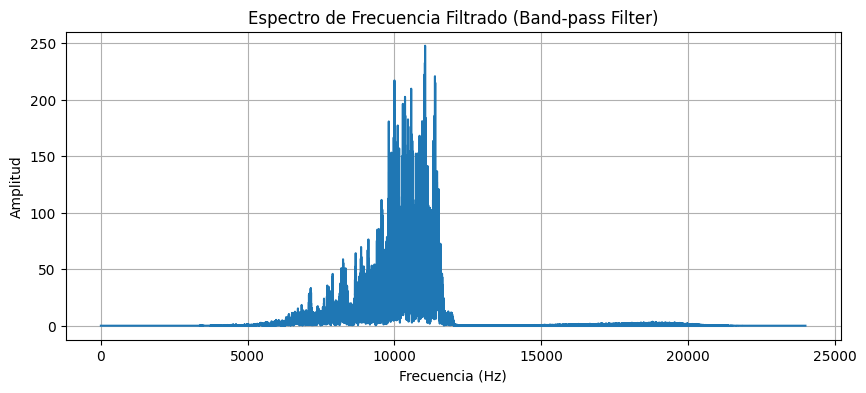

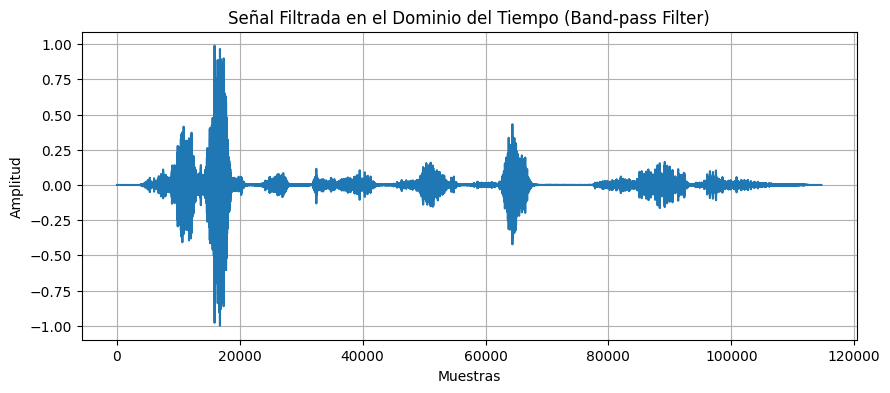

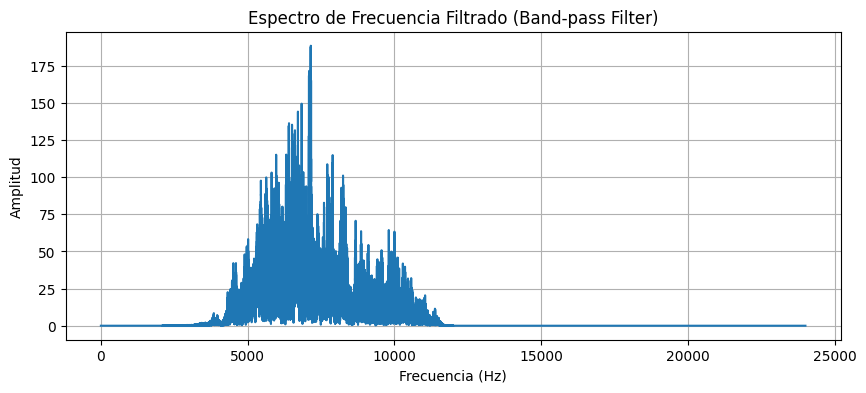

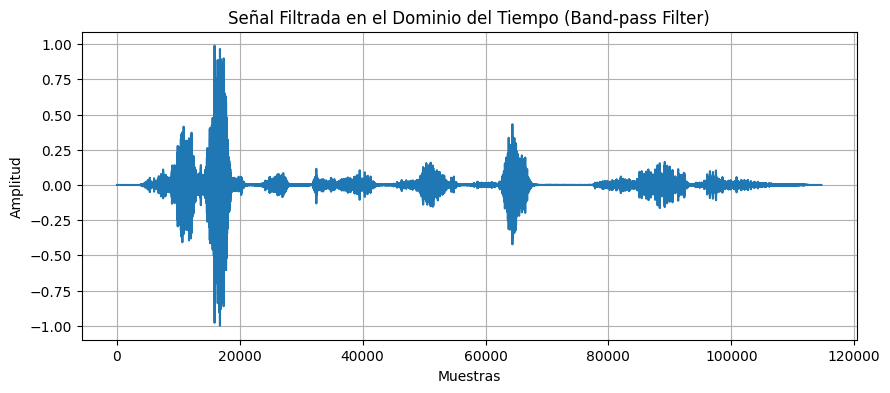

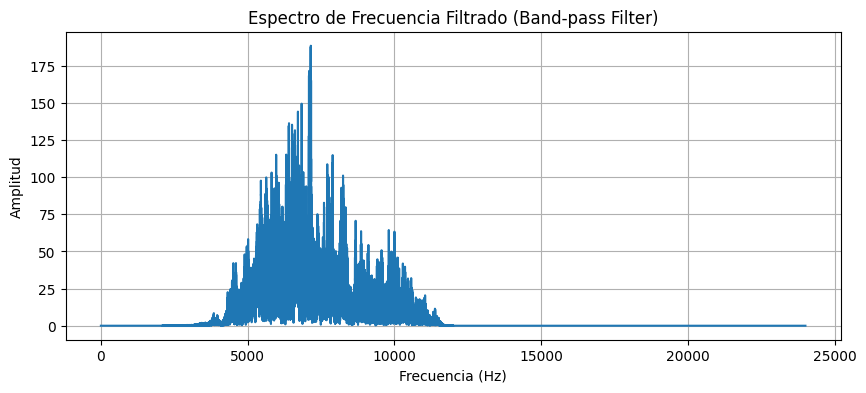

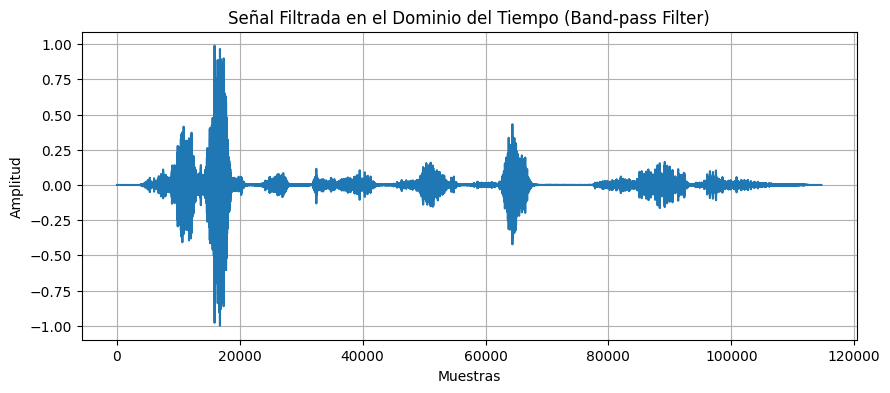

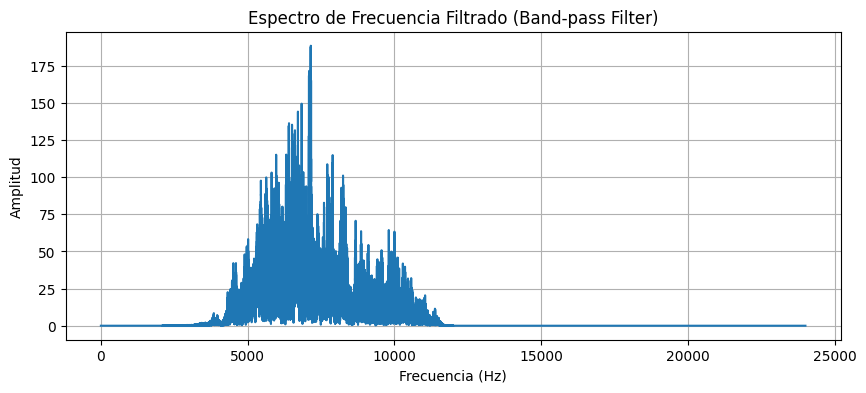

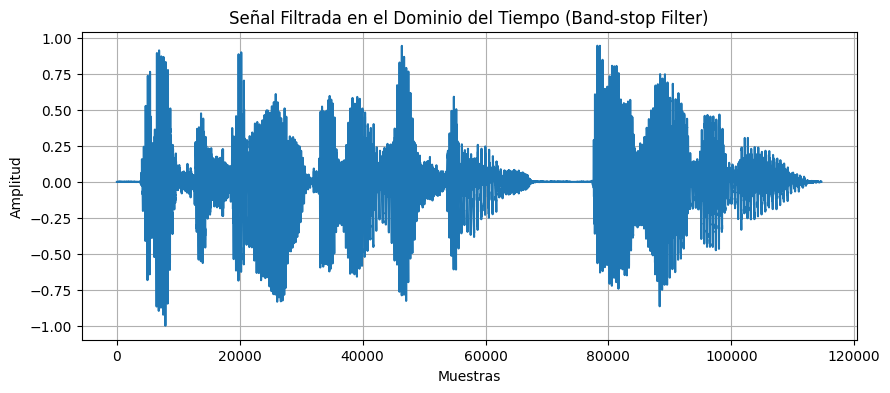

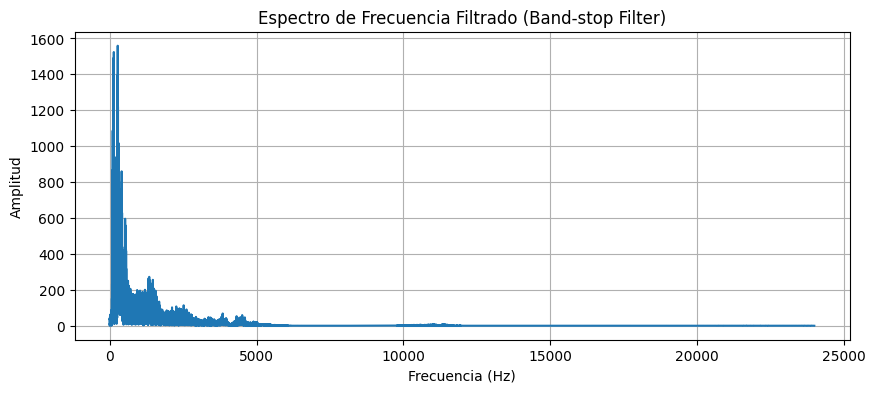

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_7292\2438012187.py", line 139, in apply_filter
    filtered_data = filtro_rechaza_banda(data, sample_rate)
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_7292\2438012187.py", line 87, in filtro_rechaza_banda
    b, a = butter(3, [low, high], btype='bandstop')
  File "C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\signal\_filter_design.py", line 3094, in butter
    return iirfilter(N, Wn, btype=btype, analog=analog,
  File "C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\signal\_filter_design.py", lin

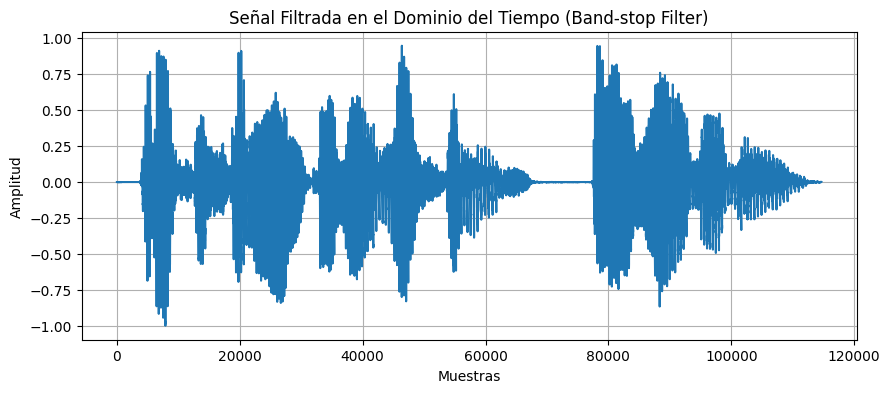

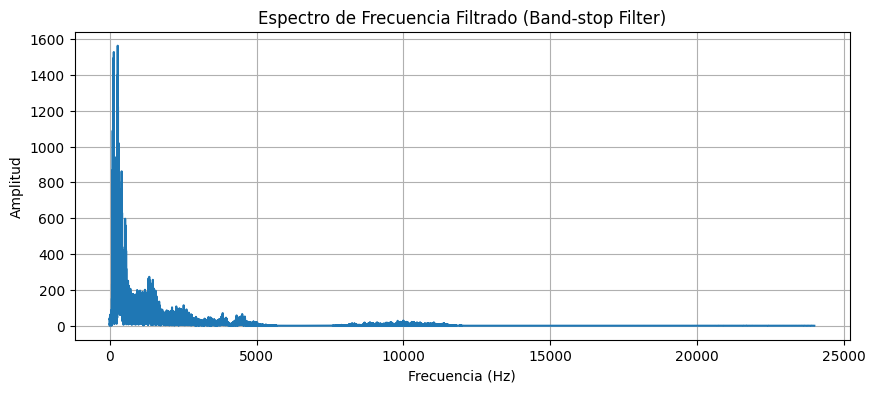

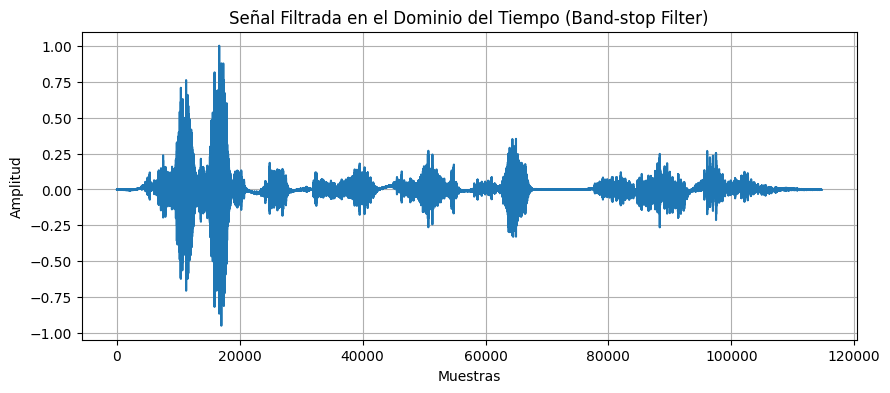

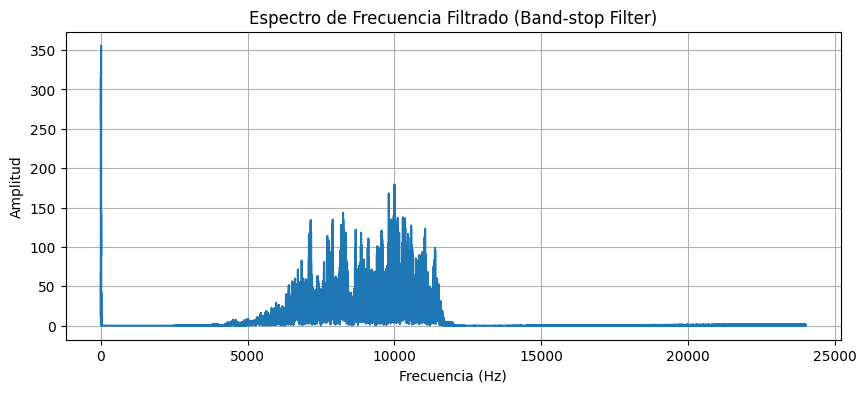

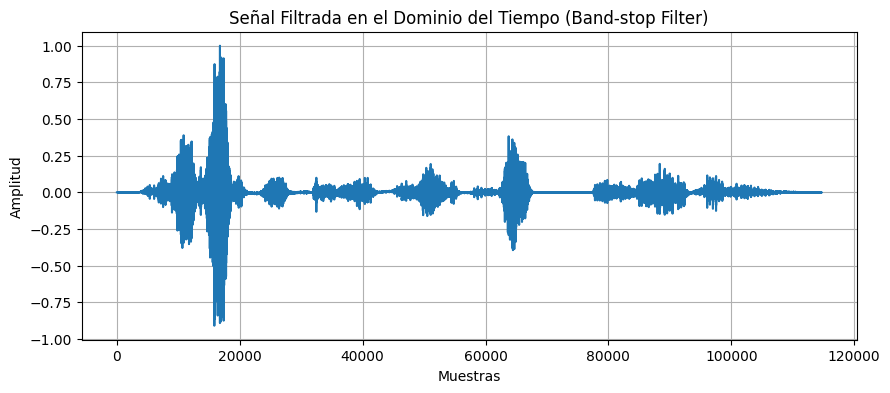

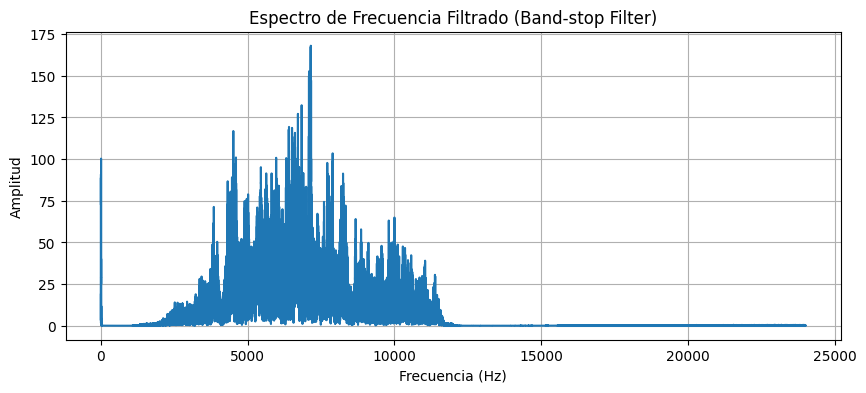

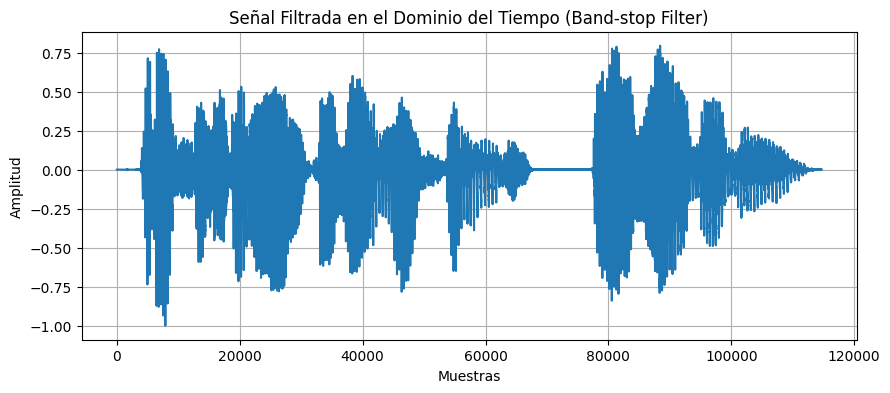

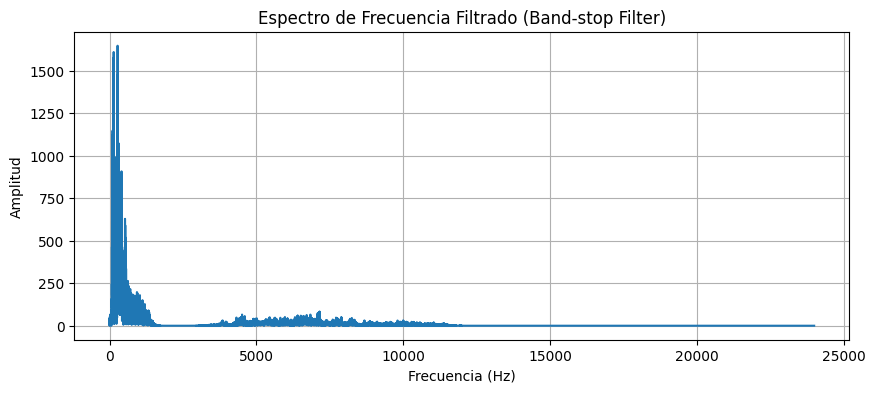

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import sounddevice as sd

# Crear la ventana principal
window = tk.Tk()
window.title("Sound Filters")
window.geometry("500x400")

# Variables globales para las frecuencias de corte
lowcut_var = tk.DoubleVar()
highcut_var = tk.DoubleVar()
cutoff_var = tk.DoubleVar()
filtered_data = None

# Añadir una etiqueta para mostrar el nombre del archivo
filename_label = tk.Label(window, text="No file selected", fg="blue")
filename_label.place(x=205, y=35)

# Función para abrir un archivo de sonido
def open_file():
    file_path = filedialog.askopenfilename(filetypes=[("WAV files", "*.wav")])
    if file_path:
        filename_label.config(text=f"Selected: {file_path.split('/')[-1]}")
        process_sound(file_path)

# Función para guardar el archivo de audio filtrado
def save_filtered_audio(filtered_data, sample_rate):    
    if filtered_data is not None:  # Verifica que los datos filtrados existan
        save_path = filedialog.asksaveasfilename(defaultextension=".wav", filetypes=[("WAV files", "*.wav")])
        if save_path:
            # Escalar los datos filtrados al rango de int16
            scaled_data = np.int16(filtered_data / np.max(np.abs(filtered_data)) * 32767)
            # Guardar el archivo con la escala adecuada
            wavfile.write(save_path, sample_rate, scaled_data)
    else:
        messagebox.showwarning("Error", "No se ha aplicado ningún filtro aún. Por favor, aplique un filtro antes de guardar.")

# Función para reproducir un archivo de sonido
def play_audio(data, sample_rate):
    sd.play(data, samplerate=sample_rate)
    sd.wait()

# Función filtro de paso bajo
def low_pass_filter(data, sample_rate):
    cutoff_freq = cutoff_var.get()
    nyquist = 0.5 * sample_rate
    low = cutoff_freq / nyquist
    b, a = butter(3, low, btype='low')
    filtered_data = filtfilt(b, a, data)
    filtered_data = filtered_data / np.max(np.abs(filtered_data))  # Normalización
    return filtered_data

# Función filtro de paso alto
def high_pass_filter(data, sample_rate):
    cutoff_freq = cutoff_var.get()
    nyquist = 0.5 * sample_rate
    high = cutoff_freq / nyquist
    b, a = butter(3, high, btype='high')
    filtered_data = filtfilt(b, a, data)
    filtered_data = filtered_data / np.max(np.abs(filtered_data))  # Normalización
    return filtered_data

# Función filtro de paso banda
def filtro_pasa_banda(data, sample_rate):
    lowcut_freq = lowcut_var.get()
    highcut_freq = highcut_var.get()
    nyquist = 0.5 * sample_rate
    low = lowcut_freq / nyquist
    high = highcut_freq / nyquist
    b, a = butter(3, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    filtered_data = filtered_data / np.max(np.abs(filtered_data))  # Normalización
    return filtered_data

# Función filtro rechaza banda
def filtro_rechaza_banda(data, sample_rate):
    lowcut_freq = lowcut_var.get()
    highcut_freq = highcut_var.get()
    nyquist = 0.5 * sample_rate
    low = lowcut_freq / nyquist
    high = highcut_freq / nyquist
    b, a = butter(3, [low, high], btype='bandstop')
    filtered_data = filtfilt(b, a, data)
    filtered_data = filtered_data / np.max(np.abs(filtered_data))  # Normalización
    return filtered_data

# Función para procesar el archivo de sonido
def process_sound(file_path):
    sample_rate, data = wavfile.read(file_path)
    
    # Si es estéreo, convertirlo a mono tomando un solo canal
    if len(data.shape) == 2:
        data = data[:, 0]
    
    # Reproducir el audio original
    play_audio(data, sample_rate)
    
    # Mostrar la señal original en el dominio del tiempo
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title("Señal Original en el Dominio del Tiempo")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()

    # Aplicar la FFT para ver el espectro de frecuencias
    N = len(data)
    T = 1.0 / sample_rate
    yf = np.fft.fft(data)
    xf = np.fft.fftfreq(N, T)[:N // 2]
    
    # Mostrar el espectro de frecuencias original
    plt.figure(figsize=(10, 4))
    plt.plot(xf, np.abs(yf[:N // 2]))
    plt.title("Espectro de Frecuencia Original")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()

    # Función para aplicar el filtro seleccionado
    def apply_filter():
        global filtered_data
        selected_filter = filter_var.get()

        if selected_filter == "Band-pass Filter":
            filtered_data = filtro_pasa_banda(data, sample_rate)
        elif selected_filter == "High-pass Filter":
            filtered_data = high_pass_filter(data, sample_rate)
        elif selected_filter == "Low-pass Filter":
            filtered_data = low_pass_filter(data, sample_rate)
        elif selected_filter == "Band-stop Filter":
            filtered_data = filtro_rechaza_banda(data, sample_rate)

        # Reproducir y guardar el audio filtrado
        play_audio(filtered_data, sample_rate)

        # Mostrar la señal filtrada en el dominio del tiempo
        plt.figure(figsize=(10, 4))
        plt.plot(filtered_data)
        plt.title(f"Señal Filtrada en el Dominio del Tiempo ({selected_filter})")
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.grid()
        plt.show()

        # Aplicar la FFT para ver el espectro de frecuencias
        N = len(filtered_data)
        T = 1.0 / sample_rate
        yf = np.fft.fft(filtered_data)
        xf = np.fft.fftfreq(N, T)[:N // 2]
        
        # Mostrar el espectro de frecuencias filtrado
        plt.figure(figsize=(10, 4))
        plt.plot(xf, np.abs(yf[:N // 2]))
        plt.title(f"Espectro de Frecuencia Filtrado ({selected_filter})")
        plt.xlabel("Frecuencia (Hz)")
        plt.ylabel("Amplitud")
        plt.grid()
        plt.show()

    # Botón para aplicar el filtro
    apply_button = tk.Button(window, text="Apply Filter", command=apply_filter)
    apply_button.place(x=220, y=300)

    # Botón para guardar el audio filtrado
    save_button = tk.Button(window, text="Guardar Audio Filtrado", command=lambda: save_filtered_audio(filtered_data, sample_rate))
    save_button.place(x=220, y=330)    

# Crear el menú desplegable para seleccionar el filtro
filter_var = tk.StringVar(window)
filter_var.set("Select a Filter")
filter_dropdown = tk.OptionMenu(window, filter_var, "High-pass Filter", "Low-pass Filter", "Band-pass Filter", "Band-stop Filter")
filter_dropdown.place(x=200, y=55)

# Crear trackbars para ajustar la frecuencia de corte
cutoff_scale = tk.Scale(window, from_=10, to=20000, resolution=1, orient='horizontal', label='Frecuencia de corte (Hz)', variable=cutoff_var)
cutoff_scale.place(x=160, y=90, width=200)

# Crear trackbars para filtro de paso banda (lowcut y highcut)
lowcut_scale = tk.Scale(window, from_=10, to=20000, resolution=1, orient='horizontal', label='Low-cut (Hz)', variable=lowcut_var)
lowcut_scale.place(x=160, y=150, width=200)
highcut_scale = tk.Scale(window, from_=10, to=20000, resolution=1, orient='horizontal', label='High-cut (Hz)', variable=highcut_var)
highcut_scale.place(x=160, y=210, width=200)

# Botón para abrir un archivo de sonido
open_button = tk.Button(window, text="Open Sound File", command=open_file)
open_button.place(x=205, y=10)

# Iniciar el loop principal
window.mainloop()
